In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os


In [73]:
# Calling set_plot_style() from plot_settings.py will set the plot style for all matplotlib plots in this notebook.
# Get the current file's directory
current_dir = os.path.dirname(os.path.realpath("__file__"))
# Add the relative path from the current directory to sys.path
sys.path.append(os.path.join(current_dir, "../src/visualization"))
from plot_settings import set_plot_style


# 1. Data preparation

### 1.1 Load Data

In [74]:
df_train = pd.read_csv("../data/raw/train.csv")
print(df_train.info())
df_train


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df_test = pd.read_csv("../data/raw/test.csv")
print(df_test.info())
df_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.2 Check for missing values

In [76]:
df_train.isnull().any().describe()


count       785
unique        1
top       False
freq        785
dtype: object

In [77]:
df_test.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [78]:
X = df_train.drop("label", axis=1)
y = df_train["label"]
print(X.shape, y.shape)


(42000, 784) (42000,)


### 1.3 Visualize the label distribution and Data

Text(0, 0.5, 'Count')

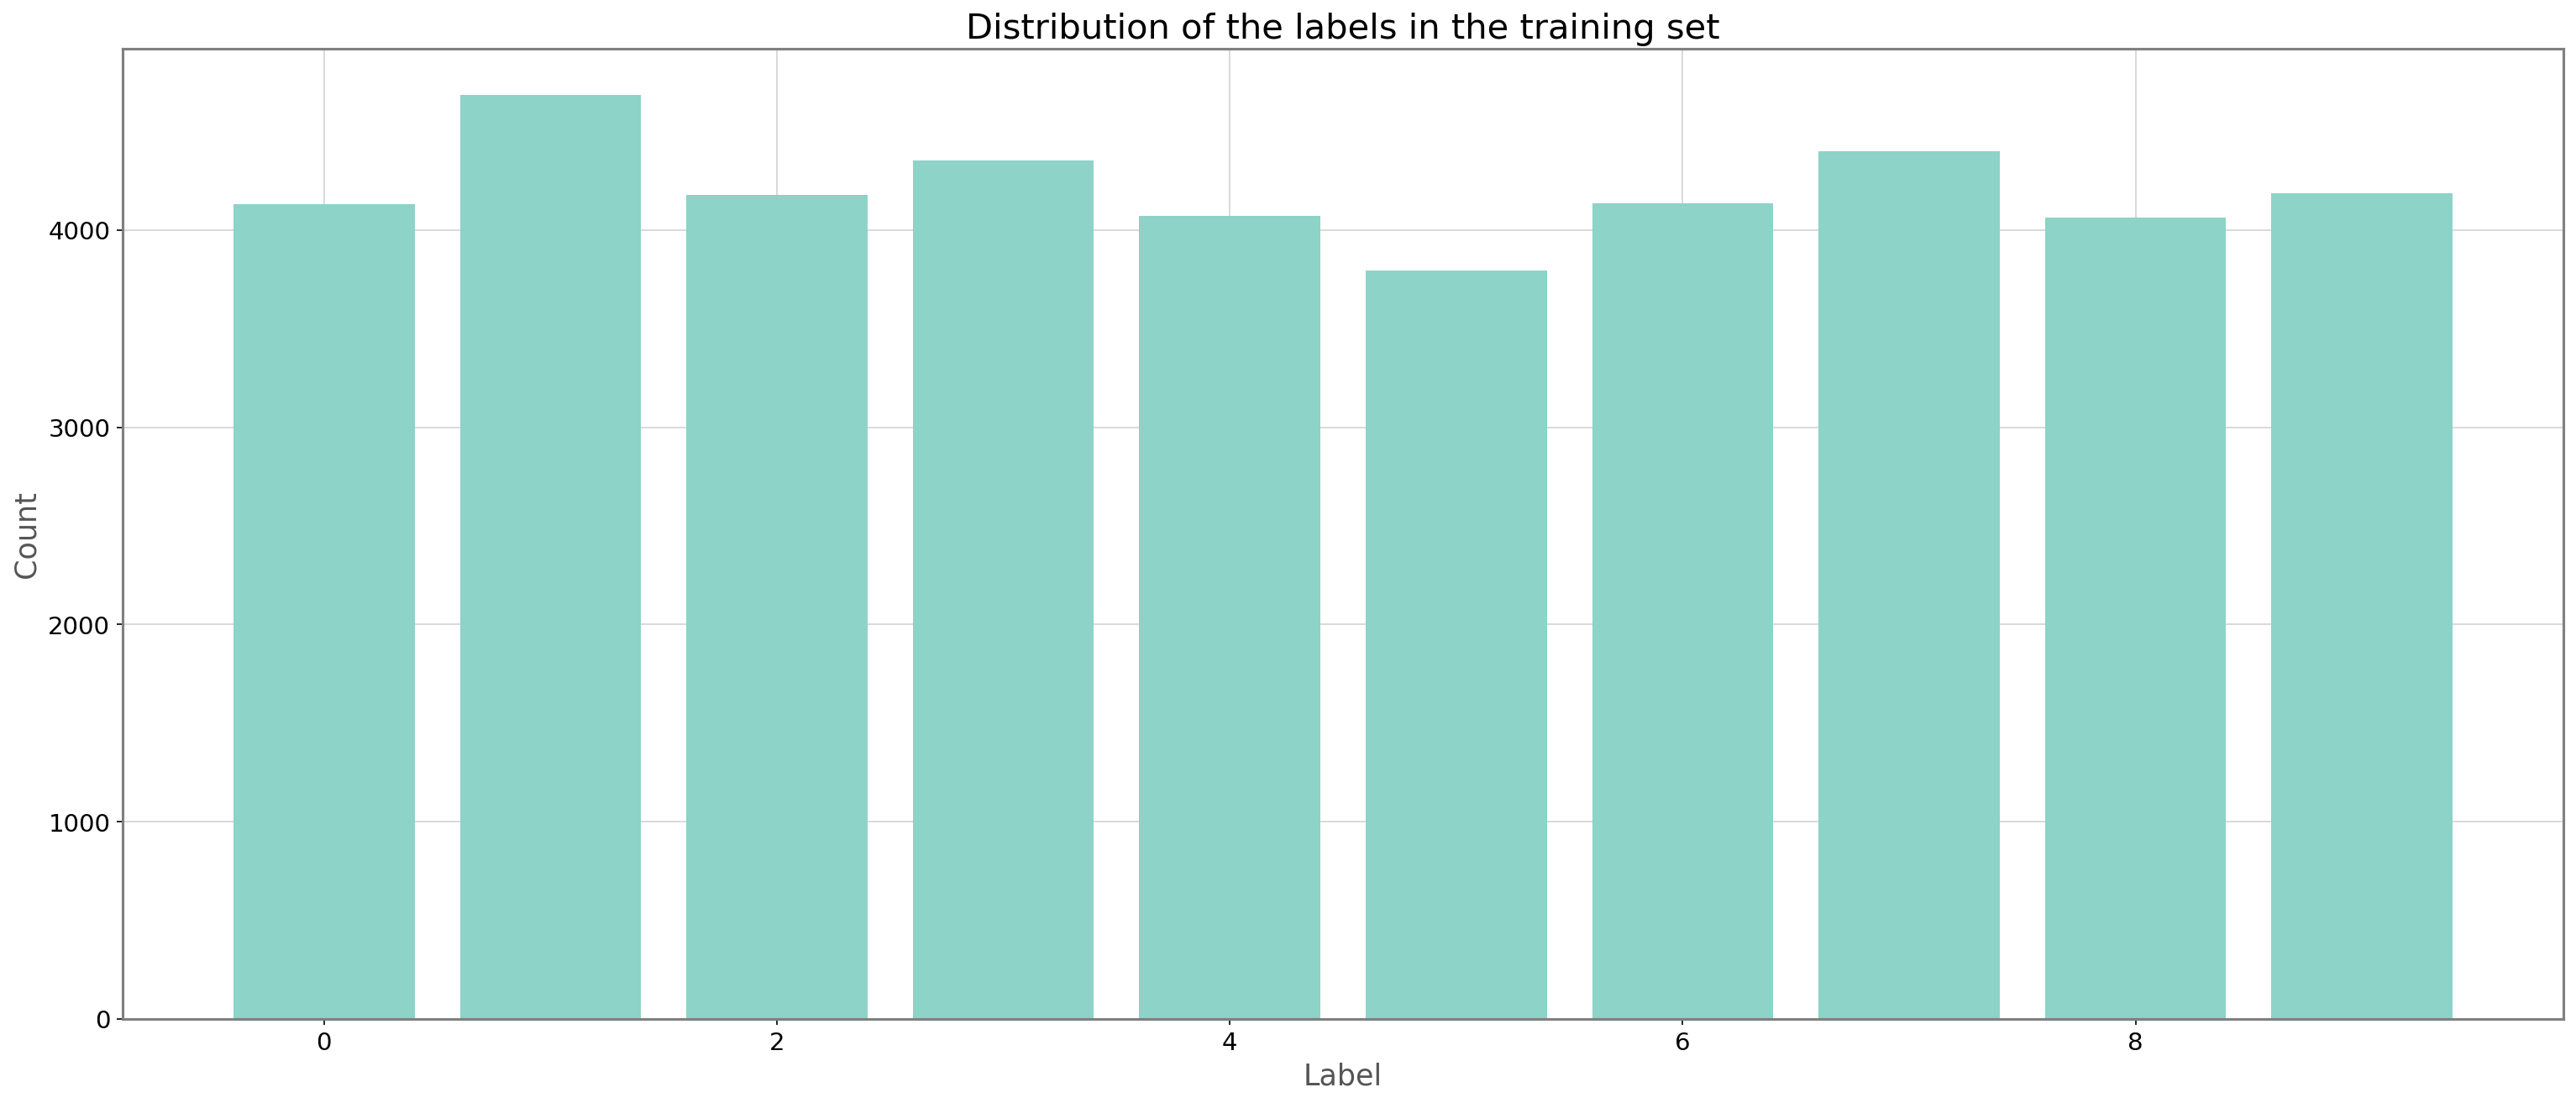

In [79]:
set_plot_style()
plt.bar(y.value_counts().index, y.value_counts())
plt.title("Distribution of the labels in the training set")
plt.xlabel("Label")
plt.ylabel("Count")


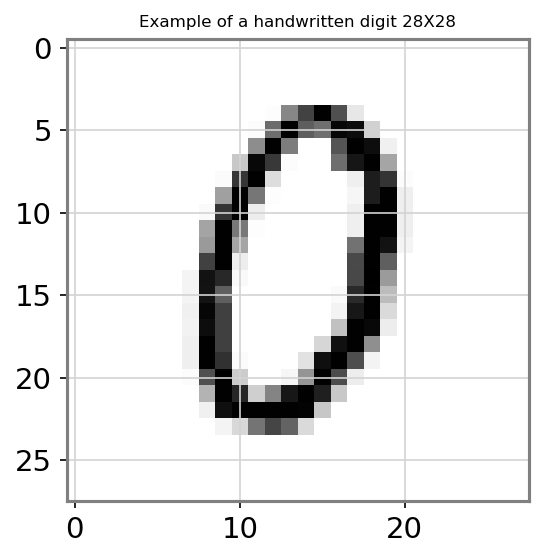

In [93]:
plt.figure(figsize=(4, 4))
plt.imshow(X.iloc[5].to_numpy().reshape(28, 28), cmap="Greys")
plt.title("Example of a handwritten digit 28X28", fontsize=8)
